In [1]:
import pandas as pd
import yfinance as yf
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

#### Smoothed recession probabilities for the United States are obtained from a dynamic-factor markov-switching model applied to four monthly coincident variables: non-farm payroll employment, the index of industrial production, real personal income excluding transfer payments, and real manufacturing and trade sales.

The forecast has a delay of approx. 3 months due to delay between collecting data and computation of the forecast.

##### Source: [FRED](https://fred.stlouisfed.org/series/RECPROUSM156N), [The FRED Blog](https://fredblog.stlouisfed.org/2015/05/how-likely-is-a-recession-and-how-fast-is-a-forecast/?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=fredblog)

In [28]:
# Pull recession probabilities
recession_prob = fred.get_series('RECPROUSM156N', observation_start='1990-01-01')
recession_prob = recession_prob.dropna()
recession_prob.tail()

2021-09-01    0.48
2021-10-01    0.02
2021-11-01    0.02
2021-12-01    0.14
2022-01-01    0.08
dtype: float64

In [38]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2022-01-01"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2.264120e+09
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2.217050e+09
2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2.369370e+09
2021-12-30,4794.229980,4808.930176,4775.330078,4778.729980,4778.729980,2.390990e+09
2021-12-31,4775.209961,4786.830078,4765.750000,4766.180176,4766.180176,2.446190e+09


In [43]:
# Pull VIX historical data
ticker = "^VIX"
start= "1990-01-01" 
end= "2022-01-01"

vix_history = yf.download(ticker, start='1990-01-01',progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-26,31.680000,32.000000,26.930000,27.59,27.59,0.0
2022-02-27,31.680000,32.000000,26.930000,27.59,27.59,0.0
2022-02-28,32.439999,33.509998,28.430000,30.15,30.15,0.0
2022-03-01,29.450001,35.189999,29.440001,33.32,33.32,0.0
2022-03-02,34.200001,34.410000,30.120001,30.74,30.74,0.0


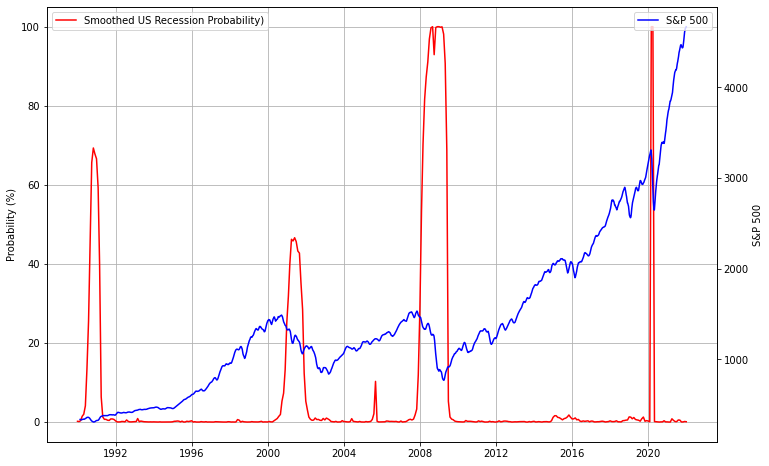

In [39]:
# Plot Recession Probability vs S&P 500
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(recession_prob, label ='Smoothed US Recession Probability)', color='r')
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

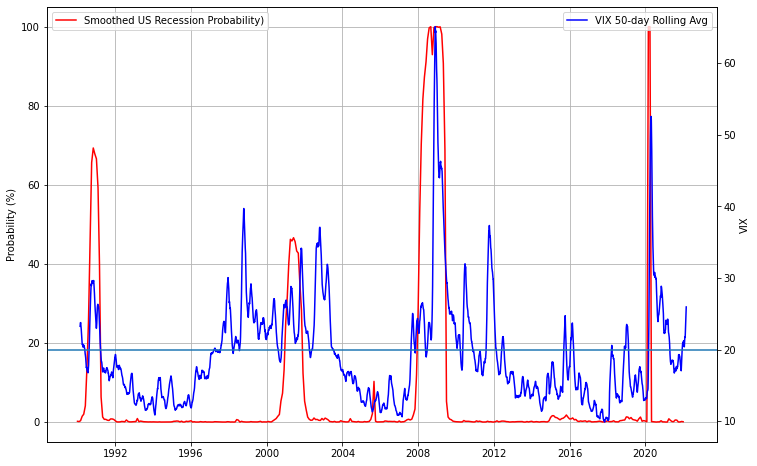

In [46]:
# Plot Recession Probability vs VIX - value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(recession_prob, label ='Smoothed US Recession Probability)', color='r')
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label ='VIX 50-day Rolling Avg', color='b')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)